**Solving a regression problem using ANN**

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import keras as ks

In [35]:
housing = fetch_california_housing()


In [36]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [37]:
X=pd.DataFrame(housing.data, columns=housing.feature_names)
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [38]:
y=housing.target

In [39]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [40]:
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [41]:
X.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [42]:
X_train_full,X_test,y_train_full,y_test=train_test_split(X,y,test_size=0.25, random_state=42)

In [43]:
X_train_full.shape,X_test.shape,y_train_full.shape,y_test.shape

((15480, 8), (5160, 8), (15480,), (5160,))

In [44]:
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full,test_size=0.2, random_state=42)

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
scaler=StandardScaler()

In [47]:
X_tr_sc=scaler.fit_transform(X_train)

In [48]:
X_valid_sc=scaler.transform(X_valid)
X_test_sc=scaler.transform(X_test)

In [49]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, LassoCV, ElasticNet,ElasticNetCV

In [50]:
linreg=LinearRegression()
linreg.fit(X_tr_sc, y_train)
y_pred=linreg.predict(X_test_sc)
mae=mean_absolute_error(y_test, y_pred)
score=r2_score(y_test, y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 0.5304369421957167
R2 Score 0.5906573951895349


In [51]:
y_train_pr=linreg.predict(X_tr_sc)
r2_score(y_train, y_train_pr)

0.6054670833394304

**ANN Model**

In [54]:
Layers=[ks.layers.Dense(30,activation="relu",input_shape=X_tr_sc.shape[1:]),
        ks.layers.Dense(10,activation="relu"),
        ks.layers.Dense(5,activation="relu"),
        ks.layers.Dense(1)]


In [55]:
model_ann=ks.models.Sequential(Layers)

In [56]:
model_ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 641 (2.50 KB)
Trainable params: 641 (2.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [57]:
LOSS="mse"
OPTIMIZER="sgd"

model_ann.compile(optimizer=OPTIMIZER, loss=LOSS)

In [59]:
Epochs=40
history=model_ann.fit(X_tr_sc, y_train, epochs=Epochs, validation_data=(X_valid_sc, y_valid))

Epoch 1/40
387/387 [==============================] - 1s 4ms/step - loss: 0.3186 - val_loss: 0.2936
Epoch 2/40
387/387 [==============================] - 1s 4ms/step - loss: 0.3156 - val_loss: 0.2933
Epoch 3/40
387/387 [==============================] - 1s 4ms/step - loss: 0.3177 - val_loss: 0.2978
Epoch 4/40
387/387 [==============================] - 2s 4ms/step - loss: 0.3134 - val_loss: 0.3136
Epoch 5/40
387/387 [==============================] - 1s 4ms/step - loss: 0.3121 - val_loss: 0.3164
Epoch 6/40
387/387 [==============================] - 1s 4ms/step - loss: 0.3104 - val_loss: 0.2906
Epoch 7/40
387/387 [==============================] - 1s 4ms/step - loss: 0.3096 - val_loss: 0.2894
Epoch 8/40
387/387 [==============================] - 1s 4ms/step - loss: 0.3091 - val_loss: 0.3070
Epoch 9/40
387/387 [==============================] - 2s 4ms/step - loss: 0.3073 - val_loss: 0.2900
Epoch 10/40
387/387 [==============================] - 2s 4ms/step - loss: 0.3059 - val_loss: 0.2953

In [60]:
pd.DataFrame(history.history)

,loss,val_loss
0,0.318573,0.293592
1,0.315581,0.293272
2,0.317665,0.297758
3,0.313414,0.313601
4,0.312106,0.316441
5,0.310444,0.290642
6,0.309624,0.289385
7,0.309104,0.307007
8,0.307316,0.290042
9,0.305882,0.295287


<AxesSubplot: >

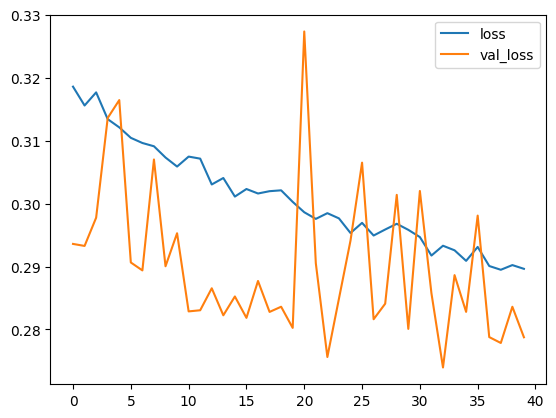

In [61]:
pd.DataFrame(history.history).plot()

In [62]:
model_ann.evaluate(X_test,y_test)

162/162 [==============================] - 1s 2ms/step - loss: 27137.1504


27137.150390625

In [63]:
y_pred_ann=model_ann.predict(X_test_sc)

162/162 [==============================] - 1s 3ms/step


In [64]:
mean_squared_error(y_pred_ann,y_test)

0.300537880150542

In [65]:
r2_score(y_pred_ann, y_test)

0.7020102687758003